<a href="https://colab.research.google.com/github/kunal15cr/Housing_society_event_planning/blob/main/Housing_society_event_planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Final_Data - Final_Data.csv.csv")

In [ ]:
df.head()

,Unnamed: 0,Flat no,Wing,Owner Name,Owner's Spouse Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation
0,0,101,A,Omkar,-,4,4,Maharashtra,500,2,Owner,6000,Yes,Owned,2500.0
1,1,102,A,Bhavana,-,5,6,Bangalore,500,2,Owner,6000,Yes,Owned,10000.0
2,2,103,A,Govind,-,5,3,Rajasthan,500,2,Owner,6000,Yes,Owned,1500.0
3,3,201,A,Reena,-,4,2,Madhya Pradesh,550,2,Tenant,6000,No,Owned,NaN
4,4,202,A,Karishma,-,7,15,Gujurat,600,3,Owner,7000,No,Owned,2500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              60 non-null     int64  
 1   Flat no                 60 non-null     int64  
 2   Wing                    60 non-null     object 
 3   Owner Name              60 non-null     object 
 4   Owner's Spouse Name     18 non-null     object 
 5   No of Resident          60 non-null     object 
 6   Confirmed Members       60 non-null     object 
 7   Origin of Owner         60 non-null     object 
 8   Flat Area (sq.mt)       60 non-null     int64  
 9   No of Room              60 non-null     int64  
 10  Tenant or owner         60 non-null     object 
 11  Maintenance Amt         32 non-null     object 
 12  Availlability of owner  60 non-null     object 
 13  Flat Vacancy            43 non-null     object 
 14  Donation                55 non-null     floa

In [ ]:
df.describe()

,Unnamed: 0,Flat no,Flat Area (sq.mt),No of Room,Donation
count,60.000000,60.000000,60.000000,60.000000,55.000000
mean,29.500000,552.000000,554.166667,2.416667,4136.363636
std,17.464249,289.653212,43.464057,0.497167,3228.138073
min,0.000000,101.000000,500.000000,2.000000,1000.000000
25%,14.750000,302.000000,500.000000,2.000000,1500.000000
50%,29.500000,552.000000,550.000000,2.000000,2500.000000
75%,44.250000,802.000000,600.000000,3.000000,6000.000000
max,59.000000,1003.000000,600.000000,3.000000,10000.000000


In [ ]:
df.nunique()

Unnamed: 0                60
Flat no                   30
Wing                       2
Owner Name                51
Owner's Spouse Name       12
No of Resident             9
Confirmed Members         14
Origin of Owner           17
Flat Area (sq.mt)          3
No of Room                 2
Tenant or owner            4
Maintenance Amt            4
Availlability of owner     3
Flat Vacancy               3
Donation                   6
dtype: int64

In [ ]:
df['Flat Vacancy'].unique()

array(['Owned', 'Vacant', '-', nan], dtype=object)

In [ ]:
df.isna().sum()

Unnamed: 0                 0
Flat no                    0
Wing                       0
Owner Name                 0
Owner's Spouse Name       42
No of Resident             0
Confirmed Members          0
Origin of Owner            0
Flat Area (sq.mt)          0
No of Room                 0
Tenant or owner            0
Maintenance Amt           28
Availlability of owner     0
Flat Vacancy              17
Donation                   5
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:

df.replace(['_','-'], np.nan, inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0                 0
Flat no                    0
Wing                       0
Owner Name                 0
Owner's Spouse Name       49
No of Resident             4
Confirmed Members          4
Origin of Owner            1
Flat Area (sq.mt)          0
No of Room                 0
Tenant or owner            0
Maintenance Amt           29
Availlability of owner     1
Flat Vacancy              18
Donation                   5
dtype: int64

In [ ]:
df.drop(["Unnamed: 0" ,"Owner's Spouse Name"],inplace=True,axis=1)

In [ ]:
df['No of Resident'] = pd.to_numeric(df['No of Resident'], errors='coerce')
df['Confirmed Members'] = pd.to_numeric(df['Confirmed Members'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          56 non-null     float64
 4   Confirmed Members       56 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         31 non-null     object 
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            42 non-null     object 
 12  Donation                55 non-null     float64
dtypes: float64(3), int64(3), object(7)
memory usage: 6.2+ KB


To address missing values in the 'Maintenance Amt' column, we iteratively go through the DataFrame. For each missing value, we impute it based on the corresponding 'Flat Area (sq.mt)' value. We reference a previously calculated dictionary, 'avg_maintenance_amt,' to fill in these values

In [ ]:
df["Maintenance Amt"] = pd.to_numeric(df['Maintenance Amt'],errors='coerce')
avg_maintenance_amt = round(df['Maintenance Amt'].mean(),2)
avg_maintenance_amt

6790.32

In [ ]:
df["Maintenance Amt"].fillna(avg_maintenance_amt,inplace=True)

In [ ]:
df['Flat Vacancy'] = np.where(df['Availlability of owner'] == 'Yes', 'Owned', 'Vacant')

In [ ]:
df[ 'Donation'].fillna(df['Donation'].median(),inplace=True)
df[ 'No of Resident'].fillna(df['No of Resident'].median(),inplace=True)
df['Confirmed Members'].fillna(df['Confirmed Members'].median(),inplace=True)

In [ ]:
df.isna().sum()

Flat no                   0
Wing                      0
Owner Name                0
No of Resident            0
Confirmed Members         0
Origin of Owner           1
Flat Area (sq.mt)         0
No of Room                0
Tenant or owner           0
Maintenance Amt           0
Availlability of owner    1
Flat Vacancy              0
Donation                  0
dtype: int64

In [ ]:
df['Confirmed Members'].unique()

array([ 4.,  6.,  3.,  2., 15.,  8., 20.,  1., 11.,  9.,  0.,  7.,  5.])

In [ ]:
df['No of Resident'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          60 non-null     float64
 4   Confirmed Members       60 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         60 non-null     float64
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            60 non-null     object 
 12  Donation                60 non-null     float64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ KB


Finally, we handle missing values in the 'Availability of owner' and 'Origin of Owner' columns by imputing them with the mode (most frequent value) of their respective columns.

In [ ]:
df['Availlability of owner'].fillna(df['Availlability of owner'].mode(),inplace=True)
df["Origin of Owner"].fillna(df["Origin of Owner"].mode(),inplace=True)

Calculate the difference between the "Confirmed Members" and "No of Resident" columns and store the result in a new column called "Outsiders."

In [ ]:
df["Outsiders"] = np.subtract(df["Confirmed Members"],df["No of Resident"])

In this step, you update the values in the "Outsiders" column. If the calculated difference is greater than zero (indicating that there are more confirmed members than residents), you set the value to x, indicating the number of outsiders.
If the difference is less than or equal to zero (indicating that there are no more confirmed members than residents), you set the value to 0, indicating that the person is a resident.

In [ ]:
df['Outsiders'] = df['Outsiders'].apply(lambda x: x if x > 0 else 0)

In [ ]:
df.head()

,Flat no,Wing,Owner Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation,Outsiders
0,101,A,Omkar,4.0,4.0,Maharashtra,500,2,Owner,6000.0,Yes,Owned,2500.0,0.0
1,102,A,Bhavana,5.0,6.0,Bangalore,500,2,Owner,6000.0,Yes,Owned,10000.0,1.0
2,103,A,Govind,5.0,3.0,Rajasthan,500,2,Owner,6000.0,Yes,Owned,1500.0,0.0
3,201,A,Reena,4.0,2.0,Madhya Pradesh,550,2,Tenant,6000.0,No,Vacant,2500.0,0.0
4,202,A,Karishma,7.0,15.0,Gujurat,600,3,Owner,7000.0,No,Vacant,2500.0,8.0


You convert the values in the 'Origin of Owner', 'Tenant or owner', 'Availability of owner' and 'Flat Vacancy' columns to lowercase to ensure uniform formatting.

Lastly, you standardize the 'Owner Name' column by converting it to title case to make names consistent and readable.

In [ ]:
columns_to_convert = ['Origin of Owner', 'Tenant or owner', 'Availlability of owner', 'Flat Vacancy']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype(str).str.lower())
df['Owner Name'] = df['Owner Name'].str.title()


In [ ]:
df


,Flat no,Wing,Owner Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation,Outsiders
0,101,A,Omkar,4.0,4.0,maharashtra,500,2,owner,6000.00,yes,owned,2500.0,0.0
1,102,A,Bhavana,5.0,6.0,bangalore,500,2,owner,6000.00,yes,owned,10000.0,1.0
2,103,A,Govind,5.0,3.0,rajasthan,500,2,owner,6000.00,yes,owned,1500.0,0.0
3,201,A,Reena,4.0,2.0,madhya pradesh,550,2,tenant,6000.00,no,vacant,2500.0,0.0
4,202,A,Karishma,7.0,15.0,gujurat,600,3,owner,7000.00,no,vacant,2500.0,8.0
5,203,A,Ragesh,4.0,4.0,kerala,500,2,tenant,5500.00,no,vacant,5000.0,0.0
6,301,A,Harshad,8.0,8.0,gujurat,550,2,owner,6000.00,yes,owned,5000.0,0.0
7,302,A,Abdul,4.0,4.0,maharashtra,600,3,owner,7000.00,yes,owned,2500.0,0.0
8,303,A,Lohit,5.0,2.0,bangalore,500,2,owner,6790.32,nan,vacant,1000.0,0.0
9,401,A,Vijay,5.0,3.0,rajasthan,550,2,tenant,6790.32,no,vacant,10000.0,0.0


In [ ]:
df_Caterer_info = pd.read_csv("/content/Caterer_info - Caterer_info.csv.csv")

In [ ]:
df_Caterer_info.head()

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
0,0,280,5000,2.4,a
1,1,420,4300,3.8,b
2,2,390,5900,3.1,c
3,3,420,6900,4.6,d
4,4,280,6500,2.3,e


In [ ]:
df_Caterer_info.shape

(20, 5)

In [ ]:
df_Caterer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20 non-null     int64  
 1   Plate Cost        20 non-null     int64  
 2   Decoration Price  20 non-null     int64  
 3   Rating            20 non-null     float64
 4   Caterer Name      20 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 928.0+ bytes


In [ ]:
df_Caterer_info.duplicated().sum()

0

In [ ]:
df_Caterer_info.describe()

,Unnamed: 0,Plate Cost,Decoration Price,Rating
count,20.00000,20.000000,20.000000,20.000000
mean,9.50000,374.000000,5430.000000,3.475000
std,5.91608,74.861275,918.866579,0.741176
min,0.00000,250.000000,4200.000000,2.300000
25%,4.75000,317.500000,4775.000000,3.100000
50%,9.50000,375.000000,5200.000000,3.550000
75%,14.25000,420.000000,6050.000000,4.000000
max,19.00000,500.000000,7000.000000,4.800000


In [ ]:
df_Caterer_info['Plate Cost'].unique()

array([280, 420, 390, 360, 250, 370, 400, 380, 440, 490, 320, 480, 500,
       310])

In [ ]:
df_Caterer_info['Decoration Price'].unique()

array([5000, 4300, 5900, 6900, 6500, 7000, 4200, 4800, 5800, 5600, 4700,
       4900, 5400])

In [ ]:
df_Caterer_info.nunique()

Unnamed: 0          20
Plate Cost          14
Decoration Price    13
Rating              12
Caterer Name        20
dtype: int64

In [ ]:
df_Caterer_info.isna().sum()

Unnamed: 0          0
Plate Cost          0
Decoration Price    0
Rating              0
Caterer Name        0
dtype: int64

In [ ]:
df_Caterer_info.duplicated().sum()

0

In [ ]:
df.head()

,Flat no,Wing,Owner Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation,Outsiders
0,101,A,Omkar,4.0,4.0,maharashtra,500,2,owner,6000.0,yes,owned,2500.0,0.0
1,102,A,Bhavana,5.0,6.0,bangalore,500,2,owner,6000.0,yes,owned,10000.0,1.0
2,103,A,Govind,5.0,3.0,rajasthan,500,2,owner,6000.0,yes,owned,1500.0,0.0
3,201,A,Reena,4.0,2.0,madhya pradesh,550,2,tenant,6000.0,no,vacant,2500.0,0.0
4,202,A,Karishma,7.0,15.0,gujurat,600,3,owner,7000.0,no,vacant,2500.0,8.0


In [ ]:
df['No of Resident'].mean()


4.083333333333333

In [ ]:

df['Origin of Owner'].value_counts()


maharashtra       15
kerala             6
rajasthan          5
madhya pradesh     4
haryana            4
tamil nadu         4
delhi              3
punjab             3
karnataka          3
gujarat            3
uttar pradesh      2
bangalore          2
gujurat            2
andhra pradesh     1
nan                1
kashmir            1
assam              1
Name: Origin of Owner, dtype: int64

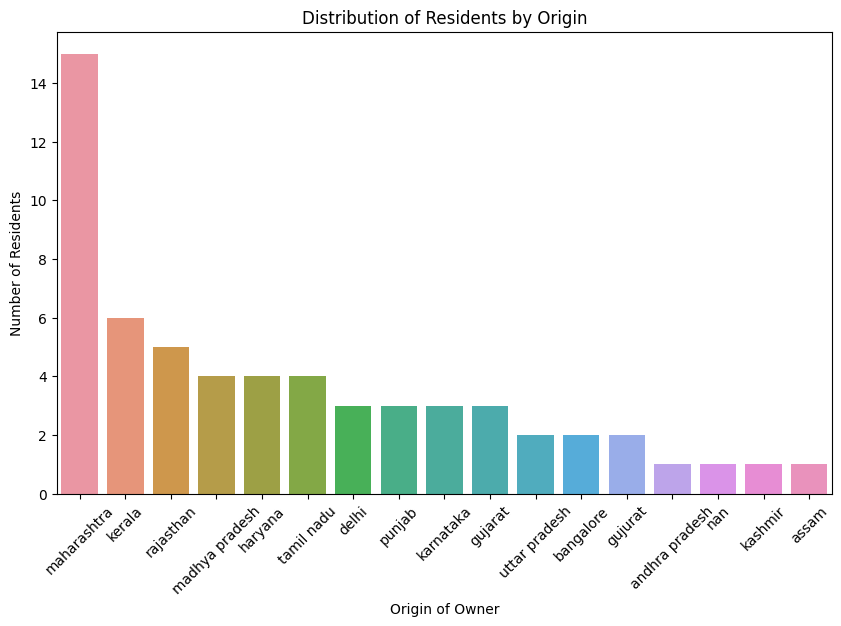

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x=df['Origin of Owner'].value_counts().index, y=df['Origin of Owner'].value_counts())
plt.xlabel('Origin of Owner')
plt.ylabel('Number of Residents')
plt.title('Distribution of Residents by Origin')
plt.xticks(rotation=45)
plt.show()


Calculate the average flat area (in square meters)


In [ ]:
df['Flat Area (sq.mt)'].mean()

554.1666666666666

In [ ]:
number_of_rooms = df['Flat no'].mode()

In [ ]:
number_of_rooms


0      101
1      102
2      103
3      201
4      202
5      203
6      301
7      302
8      303
9      401
10     402
11     403
12     501
13     502
14     503
15     601
16     602
17     603
18     701
19     702
20     703
21     801
22     802
23     803
24     901
25     902
26     903
27    1001
28    1002
29    1003
Name: Flat no, dtype: int64

In [ ]:
df['Flat Area (sq.mt)'].unique()

array([500, 550, 600])

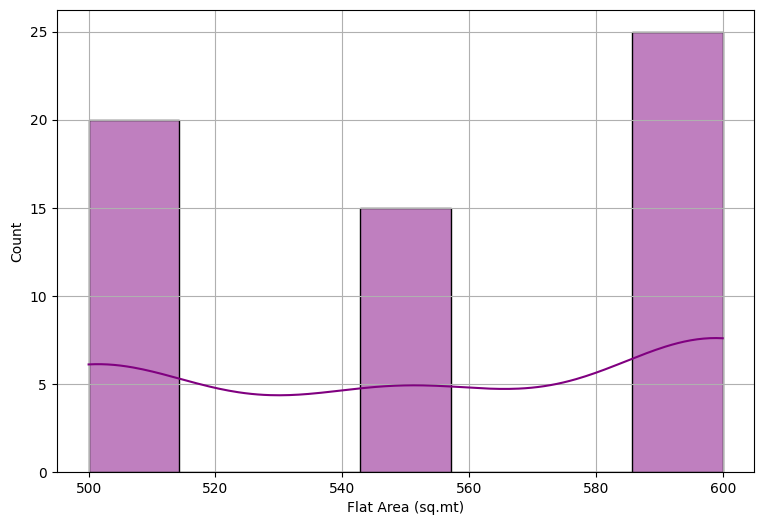

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=df,x='Flat Area (sq.mt)',kde=True,color="purple")
plt.xticks()
plt.yticks()
plt.grid()
plt.show();

In [ ]:
df.head()

,Flat no,Wing,Owner Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation,Outsiders
0,101,A,Omkar,4.0,4.0,maharashtra,500,2,owner,6000.0,yes,owned,2500.0,0.0
1,102,A,Bhavana,5.0,6.0,bangalore,500,2,owner,6000.0,yes,owned,10000.0,1.0
2,103,A,Govind,5.0,3.0,rajasthan,500,2,owner,6000.0,yes,owned,1500.0,0.0
3,201,A,Reena,4.0,2.0,madhya pradesh,550,2,tenant,6000.0,no,vacant,2500.0,0.0
4,202,A,Karishma,7.0,15.0,gujurat,600,3,owner,7000.0,no,vacant,2500.0,8.0


3. Owner and Tenant Information:

Calculate the percentage of flat owners and tenants in the housing society.


In [ ]:
owners_and_tenants_percentage = (df['Tenant or owner'].value_counts() / len(df['Tenant or owner'])) * 100
owners_and_tenants_percentage

owner     60.0
tenant    40.0
Name: Tenant or owner, dtype: float64

Visualize the distribution of flat ownership using a pie chart.





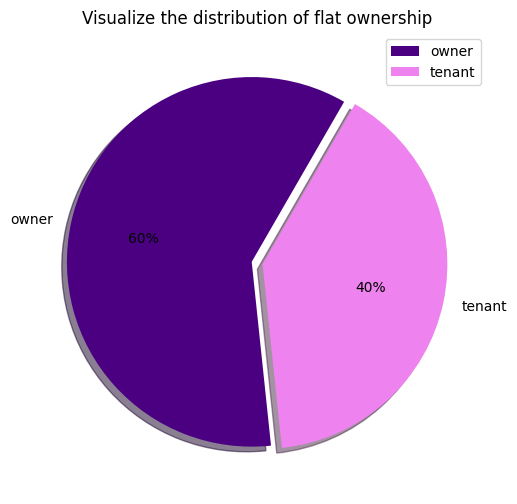

In [ ]:
plt.figure(figsize=(9,6))
plt.pie(owners_and_tenants_percentage,labels=owners_and_tenants_percentage.index,autopct="%.0f%%",colors=['indigo','violet'],explode=[0.03,0.03],shadow=True,startangle=60)
plt.legend(labels=owners_and_tenants_percentage.index)
plt.title("Visualize the distribution of flat ownership")
plt.show()



Print Calculated Statistics:

Print the calculated statistics, including the average number of residents per flat, average flat area, most common number of rooms, and percentages of flat owners and tenants.

including the average number of residents per flat

In [ ]:
residents_per_flat = df['No of Resident'].mean()
print(residents_per_flat)

4.083333333333333


 average flat area

In [ ]:
average_flat_area = df['Flat Area (sq.mt)'].mean()
print(average_flat_area)

554.1666666666666


 most common number of rooms

In [ ]:
common_number_rooms = df['No of Room'].mode()
print(common_number_rooms)

0    2
Name: No of Room, dtype: int64


percentages of flat owners and tenants.

In [ ]:
owners_and_tenants_percentage = (df['Tenant or owner'].value_counts() / len(df['Tenant or owner'])) * 100
owners_and_tenants_percentage

owner     60.0
tenant    40.0
Name: Tenant or owner, dtype: float64

Display the visualizations for the distribution of residents by origin, flat area, distribution, and the distribution of flat owners vs. tenants.



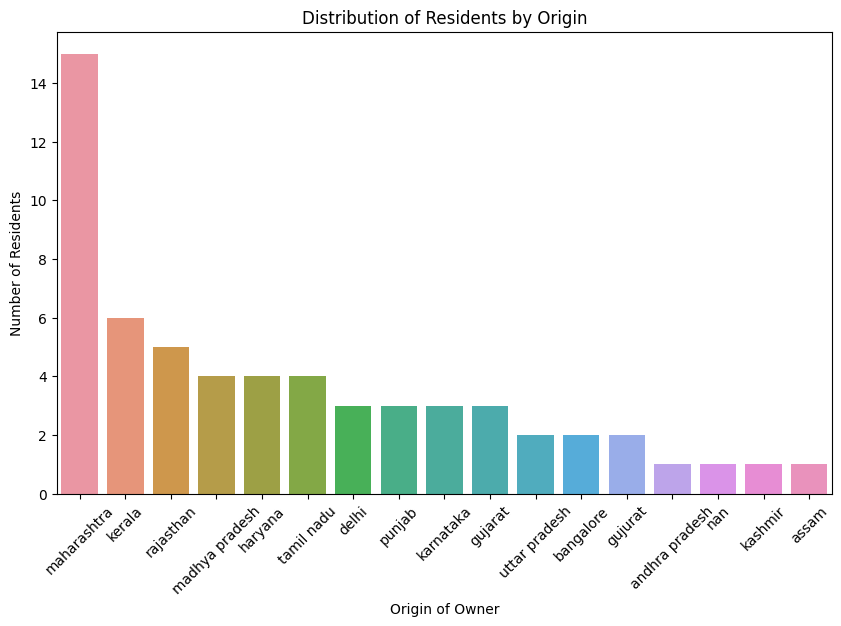

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Origin of Owner'].value_counts().index, y=df['Origin of Owner'].value_counts())
plt.xlabel('Origin of Owner')
plt.ylabel('Number of Residents')
plt.title('Distribution of Residents by Origin')
plt.xticks(rotation=45)
plt.show()

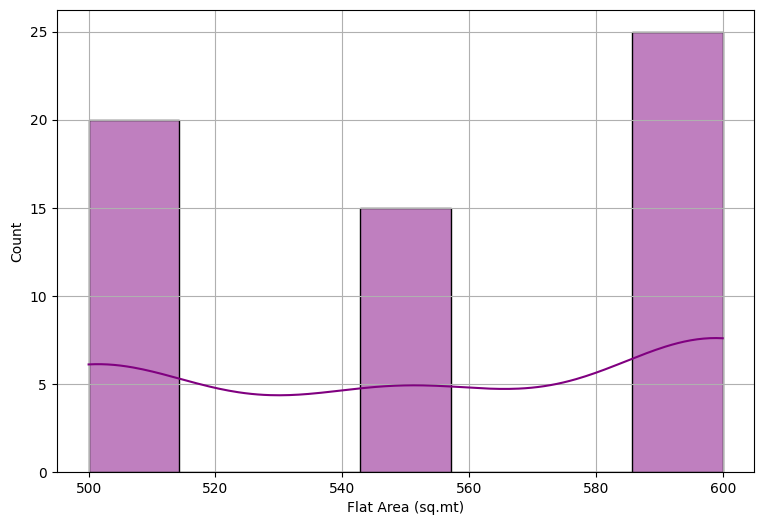

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=df,x='Flat Area (sq.mt)',kde=True,color="purple")
plt.xticks()
plt.yticks()
plt.grid()
plt.show();

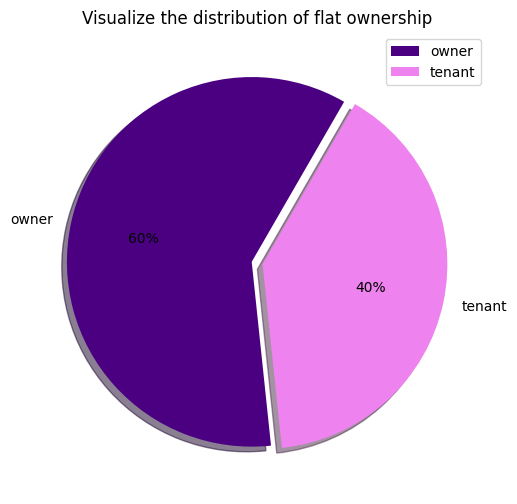

In [ ]:
plt.figure(figsize=(9,6))
plt.pie(owners_and_tenants_percentage,labels=owners_and_tenants_percentage.index,autopct="%.0f%%",colors=['indigo','violet'],explode=[0.03,0.03],shadow=True,startangle=60)
plt.legend(labels=owners_and_tenants_percentage.index)
plt.title("Visualize the distribution of flat ownership")
plt.show()

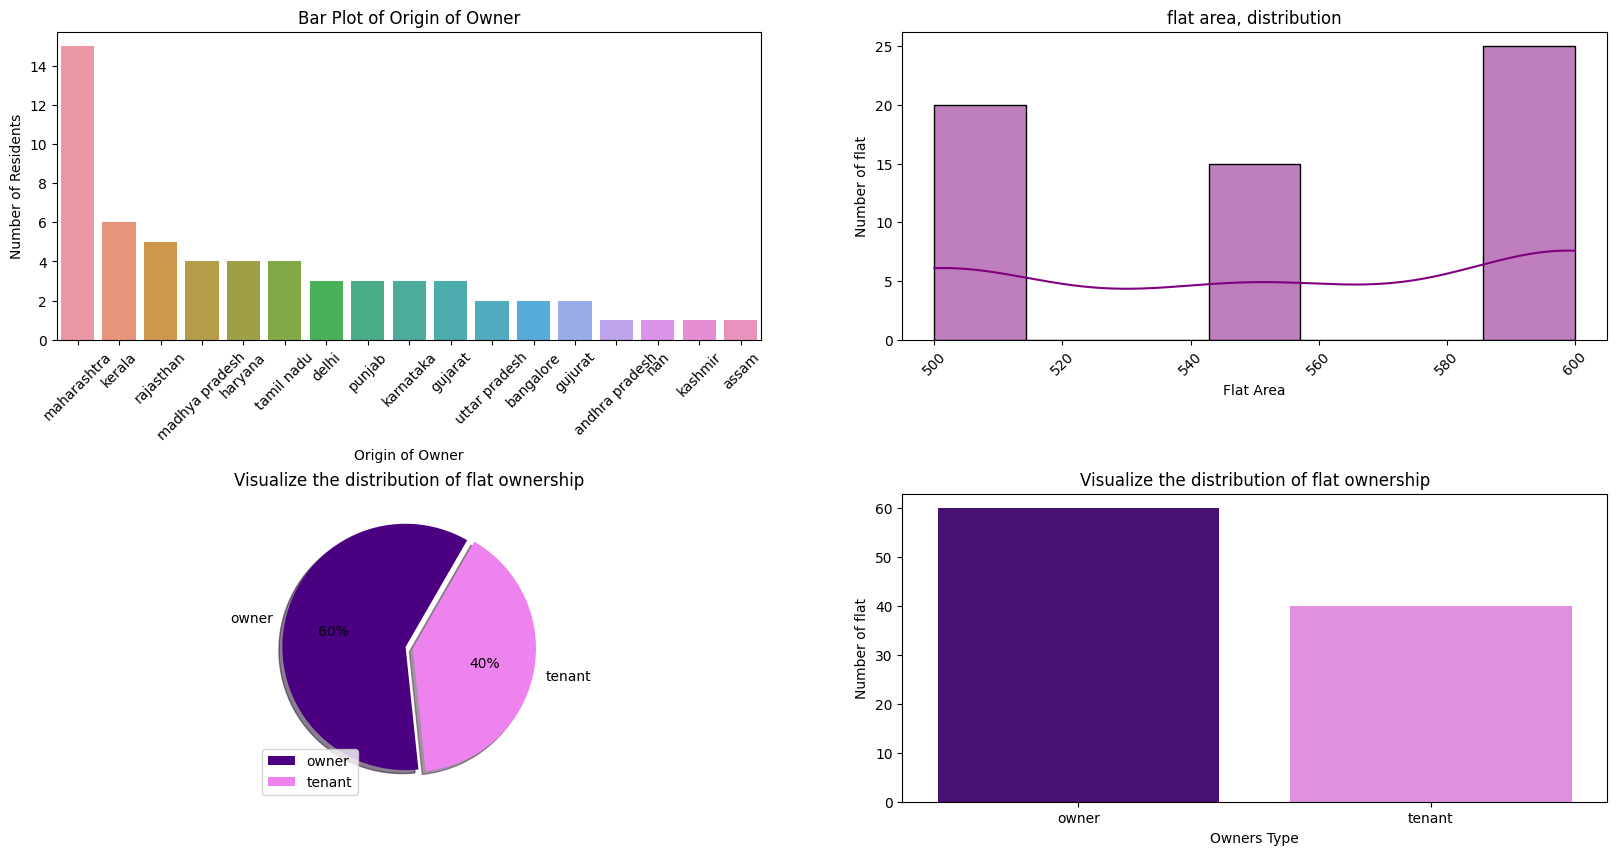

In [ ]:
fig, axs = plt.subplots(2, 2,figsize=(20,10))
sns.barplot(x=df['Origin of Owner'].value_counts().index, y=df['Origin of Owner'].value_counts(), ax=axs[0, 0],estimator=sum)
axs[0, 0].set_xlabel('Origin of Owner')
axs[0, 0].set_ylabel('Number of Residents')
axs[0, 0].set_title('Bar Plot of Origin of Owner')
axs[0, 0].tick_params(axis='x', rotation=45)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#flat area, distribution
sns.histplot(x=df['Flat Area (sq.mt)'],kde=True, color= "purple" ,ax=axs[0, 1])
axs[0, 1].set_xlabel('Flat Area')
axs[0, 1].set_ylabel('Number of flat')
axs[0, 1].set_title('flat area, distribution')
axs[0, 1].tick_params(axis='x', rotation=45)
#  distribution of flat owners vs. tenants.
axs[1, 0].pie(owners_and_tenants_percentage,labels=owners_and_tenants_percentage.index,autopct="%.0f%%",colors=['indigo','violet'],explode=[0.03,0.03],shadow=True,startangle=60)
axs[1, 0].legend(labels=owners_and_tenants_percentage.index)
axs[1, 0].set_title("Visualize the distribution of flat ownership")

#using bar
sns.barplot(x = owners_and_tenants_percentage.index,y=owners_and_tenants_percentage,ax=axs[1,1],palette=['indigo','violet'],estimator=sum)
axs[1, 1].set_title("Visualize the distribution of flat ownership")
axs[1,1].set_xlabel("Owners Type")
axs[1,1].set_ylabel("Number of flat")

plt.show()


# Task 6: Optimizing Event Planning and Resident Engagement

In [ ]:
df.head()

,Flat no,Wing,Owner Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation,Outsiders
0,101,A,Omkar,4.0,4.0,maharashtra,500,2,owner,6000.0,yes,owned,2500.0,0.0
1,102,A,Bhavana,5.0,6.0,bangalore,500,2,owner,6000.0,yes,owned,10000.0,1.0
2,103,A,Govind,5.0,3.0,rajasthan,500,2,owner,6000.0,yes,owned,1500.0,0.0
3,201,A,Reena,4.0,2.0,madhya pradesh,550,2,tenant,6000.0,no,vacant,2500.0,0.0
4,202,A,Karishma,7.0,15.0,gujurat,600,3,owner,7000.0,no,vacant,2500.0,8.0


Resident Participation Analysis: Calculate the percentage of residents who have confirmed their participation in the upcoming event. Visualize resident participation by flat type (owner/tenant) using a boxplot.

In [ ]:
df['participation'] = (df['Confirmed Members'] / df['No of Resident']) * 100

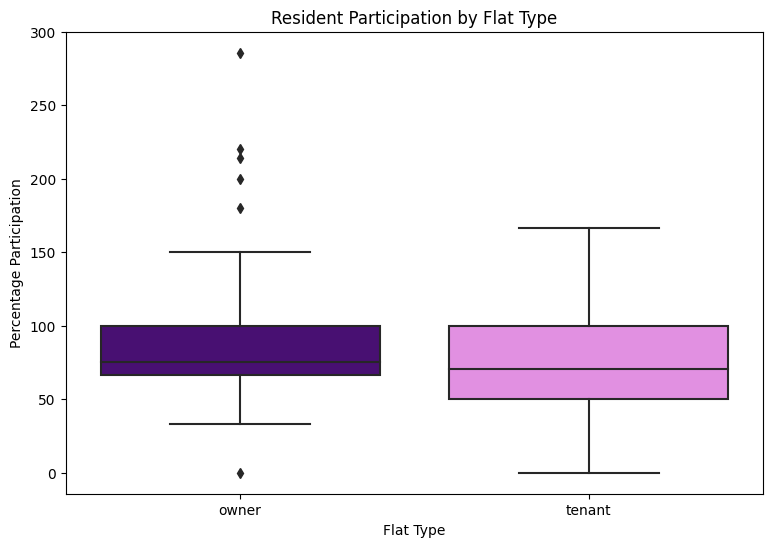

In [ ]:

plt.figure(figsize=(9, 6))
sns.boxplot(x=df['Tenant or owner'], y=df['participation'],palette=['indigo','violet'])
plt.xlabel('Flat Type')
plt.ylabel('Percentage Participation')
plt.title('Resident Participation by Flat Type')
plt.show()


Calculate the average donation amount by finding the mean of the 'Donation' column.


## 2. Donations Analysis:



Calculate the average donation amount by finding the mean of the 'Donation' column.


In [ ]:
df['Donation'].mean()

4000.0

Calculate the total donation amount by summing the 'Donation' column.

In [ ]:
df['Donation'].sum()

240000.0

In [ ]:
recommendations = []

In [ ]:

if df['Donation'].mean() >= 5000:
  recommendations.append("Increase the event budget to accommodate the generous donations.")
else:
  recommendations.append("Maintain the current event budget.")


In [ ]:

if df['participation'].mean() >= 70:
  recommendations.append("The event is likely to have a good turnout, so the organizers can plan accordingly.")
else:
  recommendations.append("The event may have a low turnout, so the organizers should consider reducing the number of attendees or finding other ways to increase participation.")


In [ ]:
# prompt: We check if the total donation amount collected exceeds 50000, indicating sufficient funds.

if df['Donation'].sum() >= 50000:
  recommendations.append("The event is well-funded and the organizers can proceed with the planned activities.")
else:
  recommendations.append("The event may need additional funding. The organizers should explore alternative sources of funding, such as sponsorships or grants.")


In [ ]:
recommendations

['Maintain the current event budget.',
 'The event is likely to have a good turnout, so the organizers can plan accordingly.',
 'The event is well-funded and the organizers can proceed with the planned activities.']

In [ ]:
df_Caterer_info

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
0,0,280,5000,2.4,a
1,1,420,4300,3.8,b
2,2,390,5900,3.1,c
3,3,420,6900,4.6,d
4,4,280,6500,2.3,e
5,5,360,7000,3.3,f
6,6,250,4200,3.4,g
7,7,370,4800,3.8,h
8,8,370,5800,3.1,i
9,9,400,6900,2.4,j


# Task 7: Decorator and Caterer Analysis for Grand Housing Society Event


In [ ]:
df_Caterer_info

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
0,0,280,5000,2.4,a
1,1,420,4300,3.8,b
2,2,390,5900,3.1,c
3,3,420,6900,4.6,d
4,4,280,6500,2.3,e
5,5,360,7000,3.3,f
6,6,250,4200,3.4,g
7,7,370,4800,3.8,h
8,8,370,5800,3.1,i
9,9,400,6900,2.4,j


In [ ]:
highest_rated_decorator = df_Caterer_info[df_Caterer_info['Rating'] == df_Caterer_info['Rating'].max()]
highest_rated_decorator

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
15,15,320,5400,4.8,p


In [ ]:
cost_effective_decorator = df_Caterer_info[df_Caterer_info['Decoration Price'] == df_Caterer_info['Decoration Price'].min()]
cost_effective_decorator

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
6,6,250,4200,3.4,g


In [ ]:
highest_rated_caterer = df_Caterer_info[df_Caterer_info['Rating'] == df_Caterer_info['Rating'].max()]
highest_rated_caterer

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
15,15,320,5400,4.8,p


In [ ]:
cost_effective_caterer = df_Caterer_info[df_Caterer_info['Plate Cost'] == df_Caterer_info['Plate Cost'].min()]
cost_effective_caterer

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
6,6,250,4200,3.4,g
12,12,250,5000,4.3,m


In [ ]:
decorator_recommendation = highest_rated_decorator
decorator_recommendation

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
15,15,320,5400,4.8,p


In [ ]:
caterer_recommendation = cost_effective_caterer
caterer_recommendation

,Unnamed: 0,Plate Cost,Decoration Price,Rating,Caterer Name
6,6,250,4200,3.4,g
12,12,250,5000,4.3,m
